#### Canny 边缘检测

标准流程：
1. 使用高斯滤波器，平滑图像，滤除噪声，减少对梯度计算造成的影响（有噪声就会存在很多细下的梯度变化）
2. 计算图像中每个像素点梯度的强度和方向
3. 应用非极大值抑制(`Non-Maxinum Supperession`)，以消除边缘检测带来的杂散效应
4. 应用双阈值(`Double-Threshold`)检测来确定真实和潜在的边缘
5. 通过抑制鼓励的弱边缘追踪完成整个检测过程

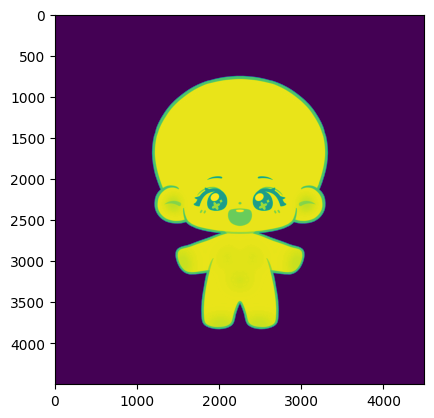

In [3]:
# notebook 里自动绘制图像
%matplotlib inline 

import cv2
import matplotlib
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('../imgs/09.png',0)
# 绘制图像
plt.imshow(img)

双阈值：

梯度包含最大阈值`maxValue`和最小阈值`minValue`

minValue: 越小，能检测出的边界越多，但是可能会弄出很多噪声，很多边界会很模糊，造成干扰
maxValue: 越大，能检测出的边界越少，但是边界会跟清晰，会损失一些细节

1. 大于最大阈值：处理为边界
2. 小于最小阈值：丢弃
3. 当且仅当梯度值大于等于最小阈值，且小于等于最大阈值，并且连有边界时才保留,否则舍弃


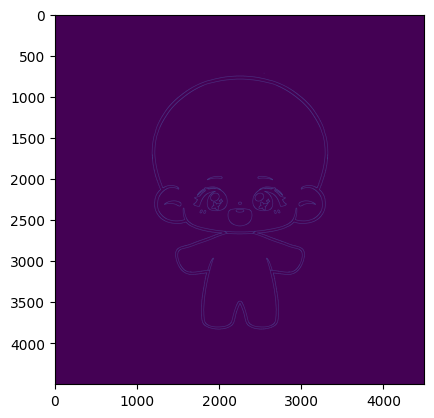

In [11]:
cannyImg = cv2.Canny(img,10,20)
plt.imshow(cannyImg)

##### 图像金字塔

下采样 - 从下往上走，缩小操作

(1125, 1125, 3)


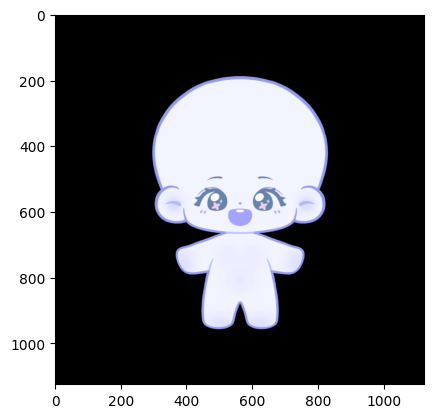

In [15]:
img = cv2.imread('../imgs/09.png')

downImage = cv2.pyrDown(img)
downImage = cv2.pyrDown(downImage)
print(downImage.shape)
plt.imshow(downImage)


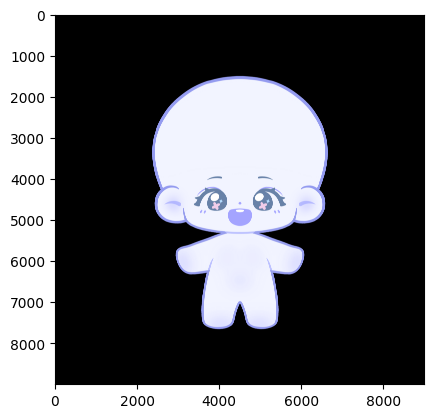

In [18]:
upImage = cv2.pyrUp(img)
plt.imshow(upImage)

##### 拉普拉斯金字塔

上采样 - 从上往下走，放大操作

新增的行和列用0填充

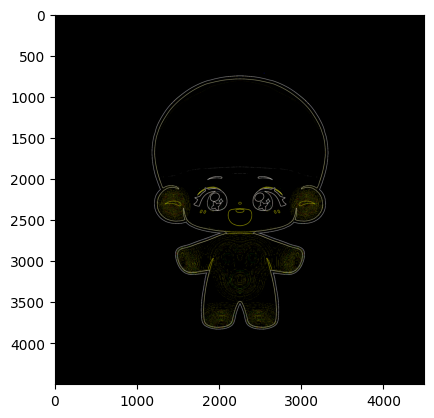

In [20]:
imgDown = cv2.pyrDown(img)
imgDownUp = cv2.pyrUp(imgDown)
laplashiImg = img - imgDownUp
plt.imshow(laplashiImg)